<a href="https://colab.research.google.com/github/SaamarthMeston/Capstone-Project-4-Online-Retail-/blob/main/Capstone_Project_4(Online_Retail).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract: A real online retail transaction data set of two years.

Data Set Information:
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Attribute Information:
* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides

In [953]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [954]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [955]:
Retail = pd.read_csv('/content/drive/MyDrive/Capstone Project 4(Online Retail)/Online Retail.xlsx - Online Retail.csv')

In [956]:
Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [957]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [958]:
Retail.shape

(541909, 8)

In [959]:
Retail.describe(include= 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [960]:
Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [961]:
Retail.dropna(inplace= True)

In [962]:
Retail.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [963]:
Retail.shape

(406829, 8)

In [964]:
Retail['InvoiceNo']= Retail['InvoiceNo'].astype('str')

In [965]:
Retail.drop(Retail[Retail['InvoiceNo'].str.contains('C')].index, axis = 0, inplace = True)

In [966]:
Retail.shape

(397924, 8)

Exploratory Data Analysis

In [967]:
Retail['Description'].unique().shape

(3877,)

# **RFM Ananlysis**

## Feature Engineering


In [968]:
Retail_Working_RFM = Retail

### Feature Creation

#### Monetary

In [969]:
# Monitary
Retail_Working_RFM['Amount'] = Retail_Working_RFM['UnitPrice']*Retail_Working_RFM['Quantity']
Monitary_df = Retail_Working_RFM.groupby('CustomerID')['Amount'].sum()
Monitary_df = Monitary_df.reset_index()
Monitary_df.columns = ['CustomerID','Monetary']
Monitary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


#### Frequency

In [970]:
# Frequency
Frequency_df = Retail_Working_RFM.groupby('CustomerID')['InvoiceNo'].count()
Frequency_df = Frequency_df.reset_index()
Frequency_df.columns = ['CustomerID','Frequency']
Frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


#### Recency

In [971]:
Retail_Working_RFM['InvoiceDate'] = pd.to_datetime(Retail_Working_RFM['InvoiceDate'], format = '%m/%d/%y %H:%M')

In [972]:
Retail_Working_RFM.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [973]:
Retail_Working_RFM['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [974]:
import datetime as dt

In [975]:
Refrence_Date = dt.datetime(2011,12,10)

In [976]:
Retail_Working_RFM['last'] = Refrence_Date - Retail_Working_RFM['InvoiceDate']

In [977]:
Recency_df = Retail_Working_RFM.groupby('CustomerID')['last'].min()
Recency_df = Recency_df.reset_index()
Recency_df.columns = ['CustomerID','Recency']
Recency_df.head()

,CustomerID,Recency
0,12346.0,325 days 13:59:00
1,12347.0,2 days 08:08:00
2,12348.0,75 days 10:47:00
3,12349.0,18 days 14:09:00
4,12350.0,310 days 07:59:00


In [978]:
Recency_df['Recency'] = Recency_df['Recency'].dt.days

In [979]:
Recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [980]:
RFM_DF = pd.merge(pd.merge(Recency_df,Frequency_df, on= 'CustomerID', how= 'inner'),Monitary_df, on='CustomerID', how ='inner')

In [981]:
RFM_DF.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [982]:
RFM_DF.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.041484,91.708689,2053.793018
std,1721.889758,100.007757,228.792852,8988.248381
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,17.000000,307.245000
50%,15299.000000,50.000000,41.000000,674.450000
75%,16778.500000,141.500000,100.000000,1661.640000
max,18287.000000,373.000000,7847.000000,280206.020000


###Scoring

In [983]:
RFM_DF_Segmented = RFM_DF

In [984]:
# #  Big to Small(larger is better)
# def BTS_Score(x):
#   Q2 =  x.quantile(.2)
#   Q4 =  x.quantile(.4)
#   Q6 =  x.quantile(.6)
#   Q8 =  x.quantile(.8)

#   for i in range(x.shape[0]+1):
#     if x[i] <= Q2:
#       return 1
#     elif x[i] <= Q4:
#       return 2
#     elif x[i] <= Q6:
#       return 3
#     elif x[i] <= Q8:
#       return 4
#     else:
#       return 5          

In [985]:
# # Small to Big
# def STB_Score(x):
#   Q2 =  x.quantile(.2)
#   Q4 =  x.quantile(.4)
#   Q6 =  x.quantile(.6)
#   Q8 =  x.quantile(.8)

#   for i in range(x.shape[0]+1):
#     if x[i] <= Q2:
#       return 5
#     elif x[i] <= Q4:
#       return 4
#     elif x[i] <= Q6:
#       return 3
#     elif x[i] <= Q8:
#       return 2
#     else:
#       return 1  

In [986]:
Quantiles = RFM_DF_Segmented[['Recency','Frequency','Monetary']].quantile(q = [0.2, 0.4, 0.6, 0.8])
Quantiles 

,Recency,Frequency,Monetary
0.2,13.2,14.0,250.106
0.4,32.0,29.0,489.724
0.6,71.0,58.0,941.942
0.8,179.0,121.0,2057.914


In [987]:
Quantiles = Quantiles.to_dict()

In [988]:
Quantiles

{'Recency': {0.2: 13.200000000000045, 0.4: 32.0, 0.6: 71.0, 0.8: 179.0},
 'Frequency': {0.2: 14.0, 0.4: 29.0, 0.6: 58.0, 0.8: 121.0},
 'Monetary': {0.2: 250.106,
  0.4: 489.72400000000005,
  0.6: 941.9419999999996,
  0.8: 2057.914}}

In [989]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def Small_to_Big_Scoring(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4    
    else:
        return 5

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)    
def Big_to_Small_Scoring(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2    
    else:
        return 1

In [990]:
RFM_DF_Segmented['R_Score'] = RFM_DF_Segmented['Recency'].apply(Small_to_Big_Scoring, args=('Recency',Quantiles,))
RFM_DF_Segmented['F_Score'] = RFM_DF_Segmented['Frequency'].apply(Big_to_Small_Scoring, args=('Frequency',Quantiles,))
RFM_DF_Segmented['M_Score'] = RFM_DF_Segmented['Monetary'].apply(Big_to_Small_Scoring, args=('Monetary',Quantiles,))

In [991]:
RFM_DF_Segmented['RFM_Group'] = RFM_DF_Segmented.R_Score.map(str)+ RFM_DF_Segmented.F_Score.map(str)+ RFM_DF_Segmented.M_Score.map(str)

In [992]:
RFM_DF_Segmented['RFM_Score'] = RFM_DF_Segmented[['R_Score','F_Score','M_Score']].sum(axis = 1)

In [993]:
RFM_DF_Segmented.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Group,RFM_Score
0,12346.0,325,1,77183.60,5,5,1,551,11
1,12347.0,2,182,4310.00,1,1,1,111,3
2,12348.0,75,31,1797.24,4,3,2,432,9
3,12349.0,18,73,1757.55,2,2,2,222,6
4,12350.0,310,17,334.40,5,4,4,544,13


In [994]:
RFM_DF_Segmented.RFM_Score.value_counts()

11    385
12    378
13    374
10    373
9     356
8     348
6     338
7     332
5     317
3     306
4     301
15    271
14    260
Name: RFM_Score, dtype: int64

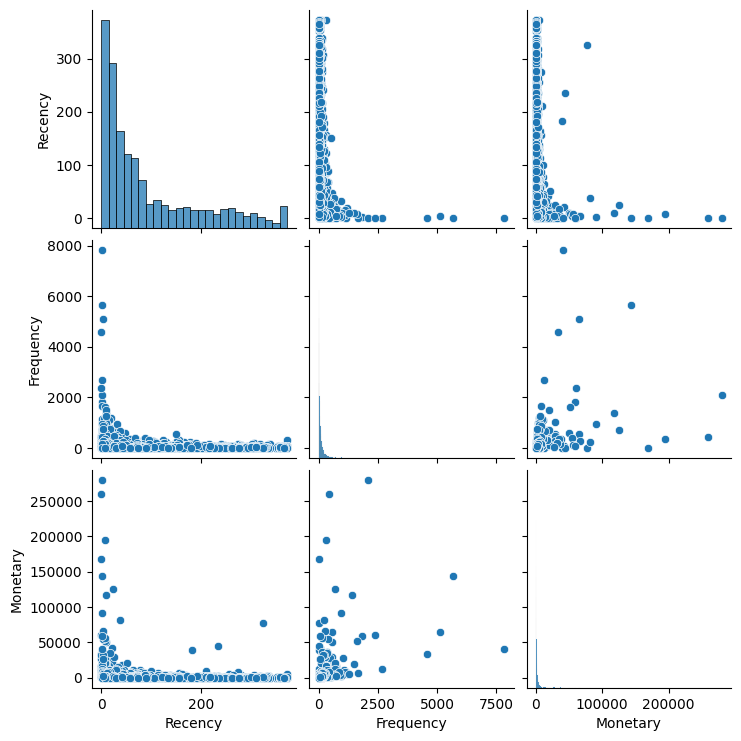

In [995]:
sns.pairplot(RFM_DF_Segmented[['Recency','Frequency','Monetary']])

### Handling Skewness

In [996]:
RFM_modeling_Df=RFM_DF_Segmented[['Recency','Frequency','Monetary']]

In [997]:
RFM_modeling_Df.skew()

Recency       1.246137
Frequency    18.106243
Monetary     19.326985
dtype: float64

In [998]:
RFM_modeling_Df.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,91.708689,2053.793018
std,100.007757,228.792852,8988.248381
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,307.245000
50%,50.000000,41.000000,674.450000
75%,141.500000,100.000000,1661.640000
max,373.000000,7847.000000,280206.020000


The Columns are postively or right skwed.
All Columns dont have a negitive value but Recency and Monetray has 0 in their values.

we can go with log transform, box cox or with yeo-johnson.

we will be going with yeo-johnson as it can handel negitive and 0 values while the other two cant.

In [999]:
features = RFM_modeling_Df.columns

In [1000]:
from sklearn.preprocessing import PowerTransformer

In [1001]:
# standardized = True, method = yeo-johnson
PT = PowerTransformer()

In [1002]:
RFM_modeling_Df = PT.fit_transform(RFM_modeling_Df)

In [1003]:
RFM_modeling = pd.DataFrame(data = RFM_modeling_Df, columns =features)

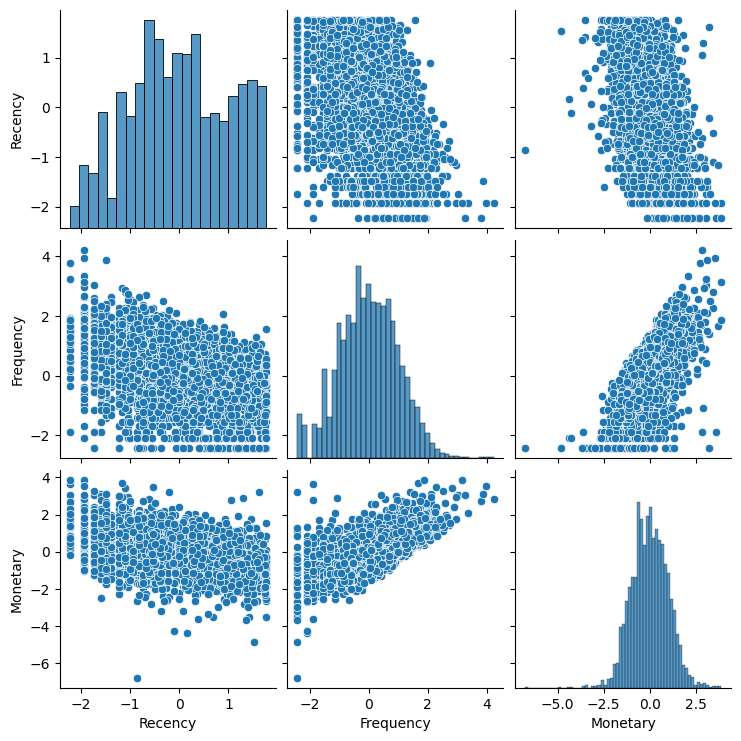

In [1004]:
sns.pairplot(RFM_modeling)

In [1005]:
RFM_modeling.skew()

Recency     -0.063294
Frequency   -0.000103
Monetary    -0.022753
dtype: float64

In [1006]:
RFM_modeling.describe()

,Recency,Frequency,Monetary
count,4.339000e+03,4.339000e+03,4.339000e+03
mean,1.522942e-16,1.662136e-16,3.930174e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.225967e+00,-2.420116e+00,-6.771115e+00
25%,-7.380041e-01,-6.778752e-01,-6.640781e-01
50%,-1.149321e-02,-1.754355e-03,-1.423703e-02
75%,8.329102e-01,7.009493e-01,6.862765e-01
max,1.761319e+00,4.225204e+00,3.885827e+00


### Scaling

In [1007]:
from sklearn.preprocessing import MinMaxScaler

In [1008]:
MandM = MinMaxScaler()

In [1009]:
RFM_modeling = MandM.fit_transform(RFM_modeling)

In [1010]:
RFM_modeling = pd.DataFrame(data = RFM_modeling, columns = features )

In [1011]:
RFM_modeling.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,0.558266,0.364184,0.635371
std,0.250826,0.150499,0.093846
min,0.000000,0.000000,0.000000
25%,0.373177,0.262176,0.573057
50%,0.555384,0.363920,0.634035
75%,0.767158,0.469664,0.699768
max,1.000000,1.000000,1.000000


## Modeling